In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d0=pd.read_csv('./train.csv')
print(d0.head(5))
l=d0['label']
d=d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [2]:
print(d.shape)
print(l.shape)


(42000, 784)
(42000,)


C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


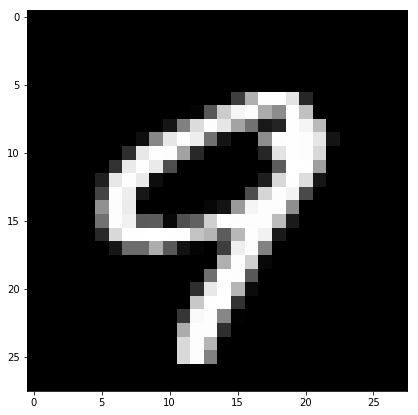

9


In [3]:
plt.figure(figsize=(7,7))
idx=100
grid_data=d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none", cmap="gray")
plt.show()
print(l[idx])

In [4]:
labels=l.head(15000)
data=d.head(15000)
print(data.shape)

(15000, 784)


In [5]:
from sklearn.preprocessing import StandardScaler
standard_data=StandardScaler().fit_transform(data)
print(standard_data.shape)

(15000, 784)


In [6]:
sample=standard_data
covar=np.matmul(sample.T,sample)
print(covar.shape)

(784, 784)


In [7]:
from scipy.linalg import eigh
values,vectors=eigh(covar,eigvals=(782,783))
vectors=vectors.T
print(vectors.shape)

(2, 784)


In [8]:
import matplotlib.pyplot as plt
new_cordinates=np.matmul(vectors,sample.T)
print(new_cordinates.shape)

(2, 15000)


In [13]:
from sklearn import decomposition
pca=decomposition.PCA()



In [14]:
pca.n_components=2
pca_data=pca.fit_transform(sample)
print(pca_data.shape)

(15000, 2)


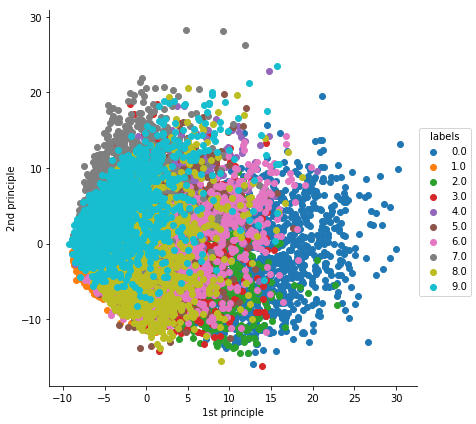

In [15]:
pca_data=np.vstack((pca_data.T,labels)).T
pca_df=pd.DataFrame(data=pca_data,columns=("1st principle","2nd principle","labels"))
sn.FacetGrid(pca_df,hue="labels",size=6).map(plt.scatter,'1st principle','2nd principle').add_legend()
plt.show()

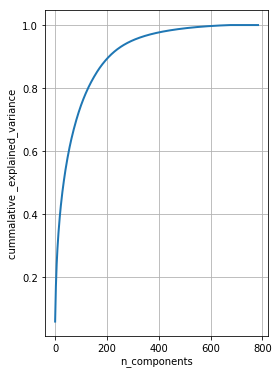

In [47]:
pca.n_components=784
pca_data=pca.fit_transform(sample)
percentage_varexp=pca.explained_variance_ /np.sum(pca.explained_variance_)
cum_var=np.cumsum(percentage_varexp)
plt.figure(1,figsize=(4,6))
plt.clf()
plt.plot(cum_var,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cummalative _explained_variance")
plt.show()


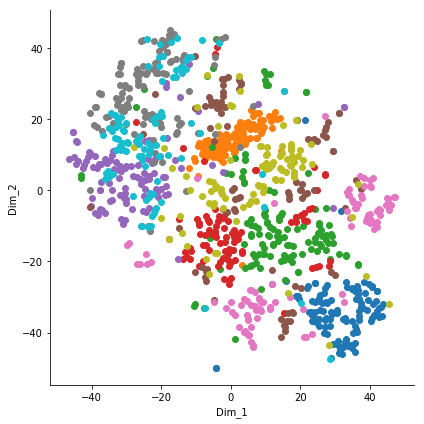

In [16]:
from sklearn.manifold import TSNE
import seaborn as sn
data_1000=standard_data[0:1000,:]
labels_1000=labels[0:1000]
model=TSNE(n_components=2,random_state=0)
tsne_data=model.fit_transform(data_1000)
tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))
sn.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2')
plt.show()